# ***Hand Written Digit Prediction - classification Analysis***


The  digits datsaet consists of 8x8 pixel images of digits. The image attribute of the Dataset store 8x8 arrays of grayscale values for each image. We  will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image reprsents.

# ***Import Library*** #

In [3]:
import pandas as pd

In [4]:
import numpy as pd

In [5]:
import matplotlib.pyplot as plt

#***Import Data***

In [6]:
from sklearn.datasets import load_digits

In [7]:
df = load_digits()

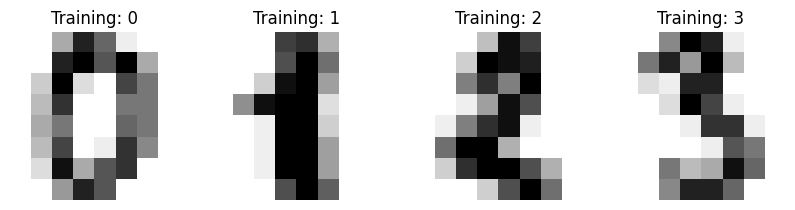

In [12]:
# prompt: _, axes = plt.subplots(nrows=1, ncol=4, figsize=(10, 3))
#  for ax, image, label in zip(axes, df.images, df.target):
#      ax.set_axis_off()
#      ax.imshow(image, cmap=plt.cm.gray.r, interpolation="nearest")
#      ax.set_title("Training: %i" % label)

import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# # Hand Written Digit Prediction - classification Analysis
#
# The  digits datsaet consists of 8x8 pixel images of digits. The image attribute of the Dataset store 8x8 arrays of grayscale values for each image. We  will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image reprsents.
# # Import Library #
# #Import Data
df = load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)


#***Data Processing***

Flatten Image 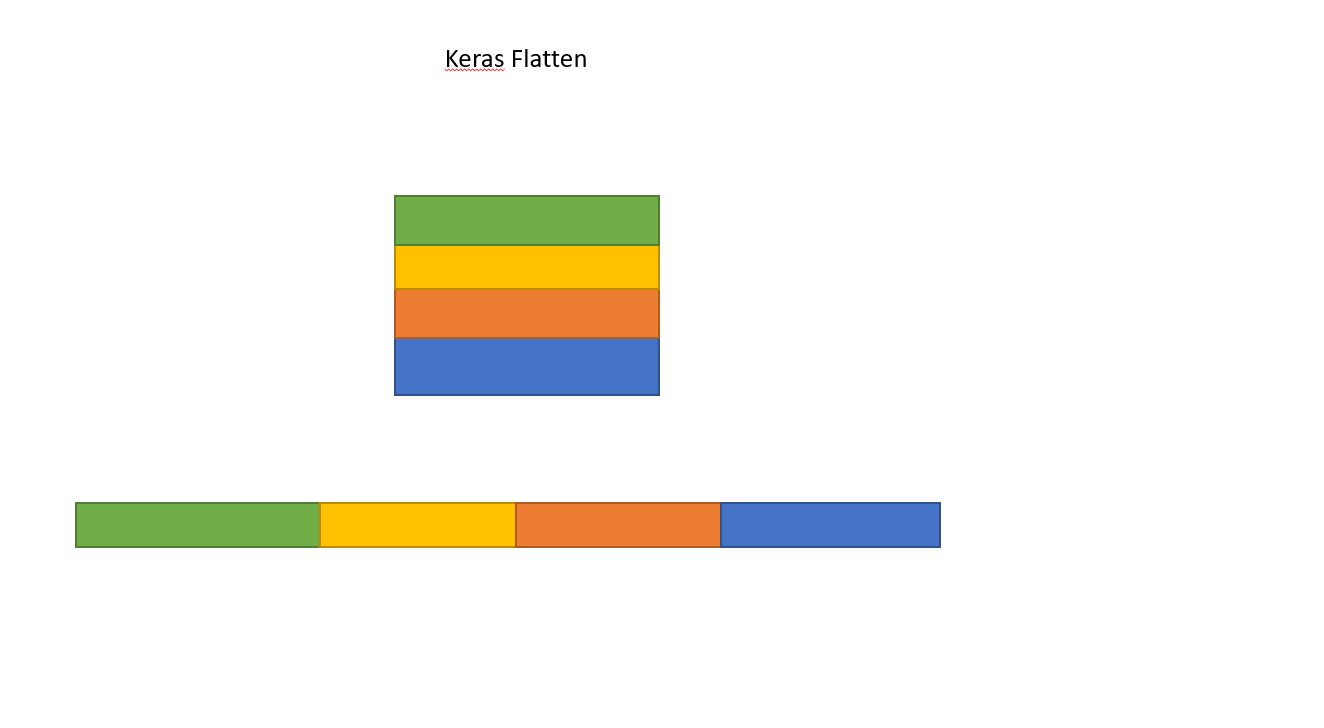

In [13]:
df.images.shape

(1797, 8, 8)

In [14]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
df.images[0].shape

(8, 8)

In [16]:
len(df.images)

1797

In [17]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [18]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
data.shape

(1797, 64)

#***Scaling Image Data***

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#***Train Test Split Data***

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#***Random Forest Model***

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

#***Predict Test data***

In [32]:
y_pred = rf.predict(X_test)

In [33]:
y_pred

array([2, 9, 6, 2, 6, 1, 1, 0, 9, 9, 3, 3, 5, 9, 1, 3, 0, 3, 0, 7, 3, 3,
       9, 8, 3, 6, 9, 8, 7, 9, 1, 6, 0, 3, 1, 1, 6, 8, 9, 4, 2, 2, 4, 2,
       2, 2, 6, 9, 4, 3, 5, 4, 0, 2, 3, 5, 7, 1, 9, 5, 9, 2, 8, 3, 5, 7,
       1, 7, 0, 2, 4, 5, 2, 9, 6, 4, 0, 1, 1, 7, 4, 8, 5, 8, 1, 0, 6, 7,
       7, 3, 5, 4, 7, 5, 1, 0, 2, 1, 7, 5, 5, 9, 4, 5, 0, 3, 5, 3, 4, 5,
       1, 8, 5, 9, 7, 6, 4, 1, 3, 7, 1, 0, 7, 5, 3, 0, 2, 2, 5, 2, 6, 7,
       1, 6, 1, 9, 8, 0, 2, 8, 9, 2, 6, 3, 8, 9, 0, 7, 5, 4, 0, 7, 6, 8,
       5, 0, 6, 5, 6, 5, 0, 7, 3, 1, 2, 2, 0, 9, 2, 6, 2, 1, 6, 2, 1, 3,
       3, 1, 9, 8, 6, 3, 7, 8, 7, 8, 3, 4, 5, 2, 1, 1, 7, 2, 9, 2, 7, 0,
       5, 0, 4, 9, 7, 6, 2, 8, 8, 7, 6, 3, 7, 5, 9, 1, 1, 5, 0, 4, 9, 5,
       6, 7, 9, 9, 3, 0, 3, 4, 6, 6, 9, 8, 3, 8, 6, 5, 5, 8, 2, 4, 6, 5,
       6, 6, 6, 9, 4, 1, 7, 8, 8, 4, 3, 7, 6, 2, 8, 8, 4, 2, 1, 2, 5, 2,
       3, 2, 8, 9, 6, 3, 3, 8, 9, 2, 4, 2, 0, 2, 2, 0, 5, 8, 9, 6, 9, 6,
       3, 1, 3, 4, 7, 6, 7, 7, 7, 0, 2, 8, 1, 7, 3,

#***Model Accurancy***

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test, y_pred)

array([[49,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 46,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 54]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      0.98      0.98        62
           2       1.00      1.00      1.00        63
           3       0.98      1.00      0.99        58
           4       0.95      1.00      0.97        36
           5       0.94      0.96      0.95        53
           6       0.98      0.96      0.97        57
           7       1.00      0.98      0.99        56
           8       0.98      0.94      0.96        49
           9       0.96      0.96      0.96        56

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

